In [72]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json


In [73]:
path = os.getcwd() + "/"
with open (path + "final_phase_across_models.json", "r") as f:
    phase_data = json.load(f,)

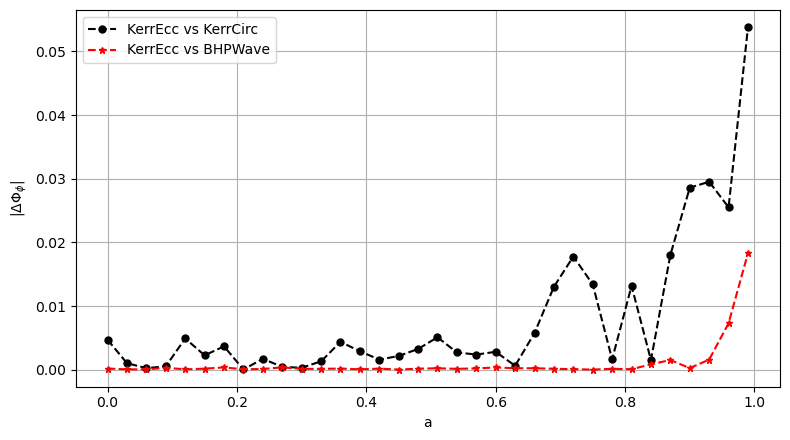

In [76]:
traj_KerrCirc = np.loadtxt(path + "Traj_KerrCirc.txt")
a_arr = np.unique(traj_KerrCirc[:,0])
delta_phi_KerrCirc = np.zeros(len(a_arr))
delta_phi_BHPWave = np.zeros(len(a_arr))
for ii, aa in enumerate(a_arr):
    data_aa = phase_data[f"spin_{aa:.4f}"]
    phase_KerrCirc = data_aa["KerrCirc"]["Phi_phi_final"]
    phase_KerrEcc = data_aa["KerrEcc"]["Phi_phi_final"]
    phase_BHPWave = data_aa["BHPWave"]["Phi_phi_final"]
    # print(f"spin {aa:.2f} phase_KerrCirc {phase_KerrCirc:.8f} phase_KerrEcc {phase_KerrEcc:.8f} phase_BHPWave {phase_BHPWave:.8f}\n")
    t_final = data_aa["KerrCirc"]["t_final"]
    delta_phi_KerrCirc[ii] = phase_KerrEcc - phase_KerrCirc
    delta_phi_BHPWave[ii] = phase_KerrEcc - phase_BHPWave
    # print(f"spin {aa:.2f} delta_phi_KerrCirc {delta_phi_KerrCirc:.8f} delta_phi_BHPWave {delta_phi_BHPWave:.8f}")
    # print(f"min separation: KerrCirc {data_aa['KerrCirc']['p_final']:.8f} , KerrEcc {data_aa['KerrEcc']['p_final']:.8f}, BHPWave {data_aa['BHPWave']['p_final']:.8f}")

fig, ax = plt.subplots(figsize=(8, 4.5))
ax.plot(a_arr, abs(delta_phi_KerrCirc), "o--", color="k", markersize=5, label="KerrEcc vs KerrCirc", rasterized=True)
ax.plot(a_arr, abs(delta_phi_BHPWave), "*--", color="r", markersize=5, label="KerrEcc vs BHPWave",rasterized=True)
ax.set_xlabel("a")
ax.set_ylabel(r"$|\Delta \Phi_{\phi}|$")
ax.legend()
ax.grid()
plt.tight_layout()
plt.savefig(path + "Cross_codes_phase_shift_vs_a.pdf")
